In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
rock = pd.read_csv("../data/rock_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
classical = pd.read_csv("../data/classical_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
jazz = pd.read_csv("../data/jazz_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
hiphop = pd.read_csv("../data/hiphop_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
punk = pd.read_csv("../data/punk_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [29]:
punk

,ID,Duration,Explicit,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Preview,Time Series,Sampling Rate,Log Mel,MFCC
0,5FFowl1Ve4S5OehL6OywSg,173266,False,63,0.616,0.727,1,-8.176,0,0.0365,...,0.860000,0.1570,0.540,92.259,4,https://p.scdn.co/mp3-preview/c9bfa2688e47287f...,[ 0.16977823 0.29338032 0.10272791 ... -0.07...,22050,[[ 17.0392 11.208787 -0.26855874 ... ...,[[ 0.91269195 -1.2655234 0.5326776 ... 0.9...
1,5jzma6gCzYtKB1DbEwFZKH,200480,False,73,0.651,0.801,0,-7.340,1,0.0513,...,0.000000,0.0825,0.776,133.763,4,https://p.scdn.co/mp3-preview/cab17680a55cff33...,[-0.10134783 -0.1273591 -0.19395848 ... -0.11...,22050,[[ 9.004435 3.850864 -0.6905058 ... -...,[[-0.13439646 0.63835746 0.46893367 ... 0.6...
2,3LoDeIbiR12sAznmpNEmKA,211973,False,55,0.323,0.978,5,-3.841,1,0.1180,...,0.000190,0.2010,0.168,134.222,4,https://p.scdn.co/mp3-preview/bff091ee5fb52185...,[-0.18005103 -0.19130185 -0.00961229 ... 0.25...,22050,[[ 14.354838 8.639382 -2.9714897 ... 1....,[[ 0.9102059 0.14420207 0.24754122 ... -1.2...
3,5szJ8SMwQVEvvdk65w6M6g,207040,False,58,0.317,0.885,8,-4.768,1,0.1440,...,0.000249,0.2210,0.704,111.366,3,https://p.scdn.co/mp3-preview/5e9fa6bc4a08b303...,[0.03329731 0.19988458 0.20809615 ... 0.054503...,22050,[[ 5.100364 4.5185657 0.9381468 ... -1....,[[ 0.27157438 0.22568858 -0.63470864 ... 0.6...
4,2yE3bwbhqypdsuhmv48Svn,163880,False,53,0.439,0.971,11,-5.855,0,0.1770,...,0.000013,0.2550,0.240,118.369,4,https://p.scdn.co/mp3-preview/040cf1909b4a2542...,[ 0.00979631 -0.00914787 -0.03493555 ... 0.16...,22050,[[-14.871793 -8.614186 -5.2936864 ... -14....,[[-1.7908818 1.7782993 -1.5281949 ... -1.6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,6PiFX2gcG6uBjMmTI28pUa,181316,False,30,0.670,0.918,0,-4.460,1,0.0422,...,0.000000,0.1710,0.800,112.496,4,https://p.scdn.co/mp3-preview/132566e45429ad3b...,[ 0.20335767 0.33319262 0.25412148 ... -0.89...,22050,[[ 6.584525 1.2696064 0.39030328 ... ...,[[-0.89007246 0.7075335 -1.4345164 ... -0.1...
143,6f8Rmx9sl0WSxUt2Tif1Kj,248543,False,28,0.375,0.971,9,-4.456,1,0.1130,...,0.000043,0.3460,0.350,169.982,4,https://p.scdn.co/mp3-preview/06979c7151d4b5ee...,[-0.14474899 -0.23449782 -0.28905478 ... 0.09...,22050,[[ 10.731006 6.588586 -0.47781375 ... -...,[[-2.178453 1.1282263 -0.09077853 ... -1.6...
144,75TGLotjHWCA2yQIh8mxRq,198055,False,34,0.499,0.909,2,-3.101,1,0.0937,...,0.000000,0.0733,0.805,159.835,4,https://p.scdn.co/mp3-preview/05608720b818fe83...,[-0.0269729 -0.17115533 -0.11100436 ... 0.23...,22050,[[ 9.592943 10.880922 10.664953 ... 14.402...,[[-0.22099937 0.7263702 -0.37702835 ... -0.5...
145,7FGpKzfwHFFSXQjR9LHo69,182016,False,26,0.278,0.826,0,-6.162,1,0.0482,...,0.011800,0.1300,0.743,186.200,4,https://p.scdn.co/mp3-preview/eef28096a5512616...,[ 0.01607545 0.01026373 0.01223662 ... -0.15...,22050,[[ 16.149094 10.766939 14.772879 ... 19.434...,[[-0.46366572 1.9906816 -1.979304 ... 0.0...


In [21]:
rock_sample = rock.sample(100)
rock_sample.describe()

,Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Sampling Rate
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0
mean,252693.040000,68.360000,0.503460,0.78577,5.560000,-7.228090,0.690000,0.064139,0.075957,0.058927,0.185268,0.58211,127.077630,3.950000,22050.0
std,69371.935043,8.239496,0.145158,0.15674,3.534305,2.897372,0.464823,0.052994,0.130254,0.178092,0.141405,0.21373,29.065219,0.219043,0.0
min,121160.000000,46.000000,0.104000,0.32200,0.000000,-17.180000,0.000000,0.025700,0.000002,0.000000,0.043700,0.17000,74.807000,3.000000,22050.0
25%,210212.750000,63.750000,0.397750,0.70275,2.000000,-8.744000,0.000000,0.032200,0.001990,0.000008,0.085350,0.42200,105.358250,4.000000,22050.0
50%,242026.000000,71.000000,0.516000,0.83450,6.000000,-6.721500,1.000000,0.045300,0.012000,0.000395,0.134500,0.58550,123.606000,4.000000,22050.0
75%,277165.750000,74.000000,0.612250,0.90375,9.000000,-4.985000,1.000000,0.073925,0.065225,0.010600,0.235000,0.75700,144.774500,4.000000,22050.0
max,517125.000000,83.000000,0.823000,0.98900,11.000000,-2.042000,1.000000,0.405000,0.686000,0.952000,0.682000,0.92300,195.303000,4.000000,22050.0


<BarContainer object of 100 artists>

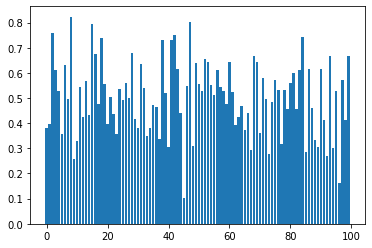

In [24]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(rock_sample['Danceability'])), rock_sample['Danceability'])

In [25]:
rock_sample['Danceability'].mean()

0.50346

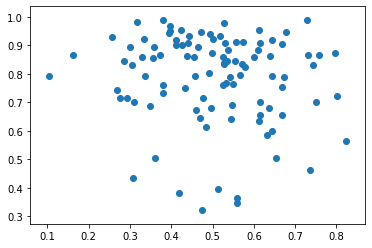

In [27]:
plt.scatter(rock_sample['Danceability'], rock_sample['Energy'])

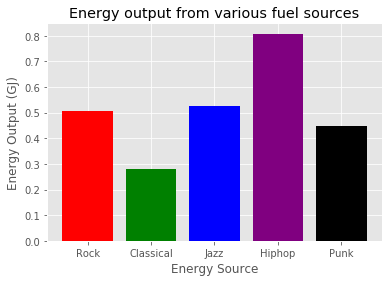

In [66]:
plt.style.use('ggplot')

genre = ['Rock', 'Classical', 'Jazz', 'Hiphop', 'Punk']
energy = [rock['Danceability'].mean(), classical['Danceability'].mean(), jazz['Danceability'].mean(), hiphop['Danceability'].mean(), punk['Danceability'].mean()]
genre_pos = np.arange(len(genre))

plt.bar(genre_pos, energy, color=['red','green','blue','purple','black'])
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(genre_pos, genre)

plt.show()

In [61]:
rock.head(1).T

,0
ID,62nQ8UZVqR2RMvkJHkcO2o
Duration,318226
Explicit,False
Popularity,72
Danceability,0.285
Energy,0.846
Key,2
Loudness,-6.472
Mode,1
Speechiness,0.0438


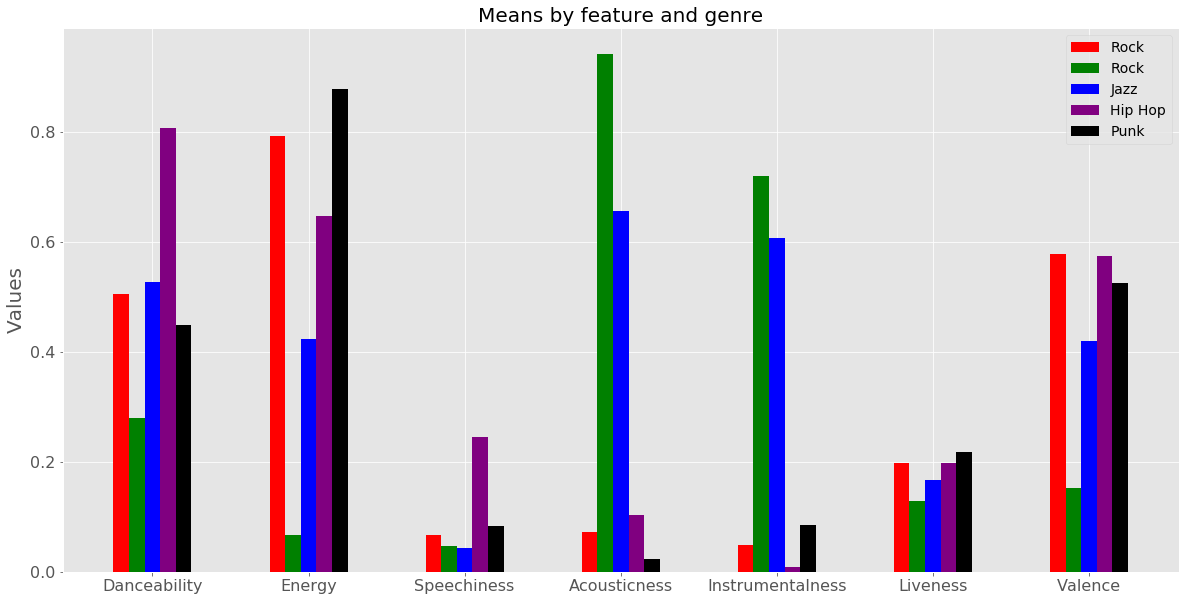

In [109]:
rock_means = [rock['Danceability'].mean(), rock['Energy'].mean(), rock['Speechiness'].mean(), rock['Acousticness'].mean(), rock['Instrumentalness'].mean(), rock['Liveness'].mean(), rock['Valence'].mean()]
classical_means = [classical['Danceability'].mean(), classical['Energy'].mean(), classical['Speechiness'].mean(), classical['Acousticness'].mean(), classical['Instrumentalness'].mean(), classical['Liveness'].mean(), classical['Valence'].mean()]
jazz_means = [jazz['Danceability'].mean(), jazz['Energy'].mean(), jazz['Speechiness'].mean(), jazz['Acousticness'].mean(), jazz['Instrumentalness'].mean(), jazz['Liveness'].mean(), jazz['Valence'].mean()]
hiphop_means = [hiphop['Danceability'].mean(), hiphop['Energy'].mean(), hiphop['Speechiness'].mean(), hiphop['Acousticness'].mean(), hiphop['Instrumentalness'].mean(), hiphop['Liveness'].mean(), hiphop['Valence'].mean()]
punk_means = [punk['Danceability'].mean(), punk['Energy'].mean(), punk['Speechiness'].mean(), punk['Acousticness'].mean(), punk['Instrumentalness'].mean(), punk['Liveness'].mean(), punk['Valence'].mean()]

N = len(rock_means)
ind = np.arange(N)

width = 0.1 

plt.figure(figsize=(20,10))
plt.bar(ind, rock_means, width, label='Rock', color='red')
plt.bar(ind + width, classical_means, width, label='Rock', color='green')
plt.bar(ind + width * 2, jazz_means, width, label='Jazz', color='blue')
plt.bar(ind + width * 3, hiphop_means, width, label='Hip Hop', color='purple')
plt.bar(ind + width * 4, punk_means, width, label='Punk', color='black')



plt.ylabel('Values', fontsize=20)
plt.title('Means by feature and genre', fontsize=20)

plt.xticks(ind + width*4 / 2, ('Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence'), fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.show()